# Лабораторная работа №5

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

# Задание №1

### Скачиваем dataset и оформляем его в DataFrame

In [103]:
cancer = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = pd.Series(cancer.target)
df_cancer['name'] = df_cancer.target.apply(lambda x : cancer.target_names[x])
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


### Убедимся в несбалансированности классов

In [104]:
print ("Total number of diagnosis are ", str(df_cancer.shape[0]), ", ", df_cancer.name.value_counts()['benign'], "Benign and Malignant are", df_cancer.name.value_counts()['malignant'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


### Обучаем логистическую регрессию

In [105]:
X = df_cancer.drop(['target', 'name'], axis=1)
y = df_cancer['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [106]:
model = LogisticRegression(C=1e10)
model.fit(x_train, y_train)

LogisticRegression(C=10000000000.0)

# Задание №2

### Вычисляем значения матрицы ошибок

In [107]:
y_pred = model.predict(x_test)
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
tn, fp, fn, tp 

(62, 5, 4, 117)

### Точность

In [108]:
print('Train Accuracy', metrics.accuracy_score(y_train, model.predict(x_train)))
print('Test Accuracy', metrics.accuracy_score(y_test, y_pred))

Train Accuracy 0.9606299212598425
Test Accuracy 0.9521276595744681


In [109]:
print('Test Accuracy', (tp + tn) / (tp + tn + fn + fp))

Test Accuracy 0.9521276595744681


### Полнота

In [110]:
print('Train Precision', metrics.precision_score(y_train, model.predict(x_train)))
print('Test Precision', metrics.precision_score(y_test, y_pred))

Train Precision 0.9623430962343096
Test Precision 0.9590163934426229


In [111]:
print('Test Precision', tp / (tp + fp))

Test Precision 0.9590163934426229


### Специфичность

In [112]:
print('Train Recall', metrics.recall_score(y_train, model.predict(x_train)))
print('Test Recall', metrics.recall_score(y_test, y_pred))

Train Recall 0.9745762711864406
Test Recall 0.9669421487603306


In [113]:
print('Test Recall', tp / (tp + fn))

Test Recall 0.9669421487603306


# Задание №3, 4

### ROC AUC для тренировочной выборки

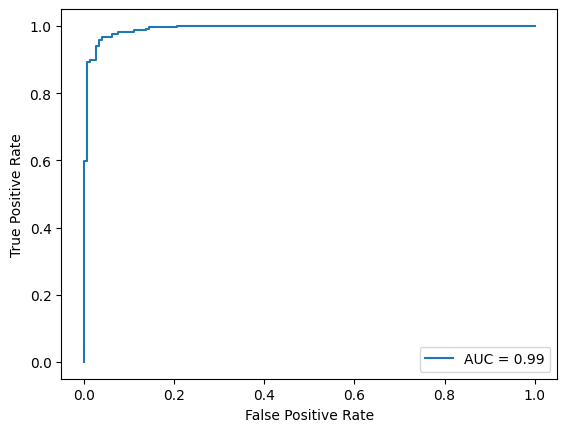

In [114]:
y_score = model.decision_function(x_train)
fpr, tpr, _ = metrics.roc_curve(y_train, y_score)
roc_auc = metrics.roc_auc_score(y_train, y_score)
roc_display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

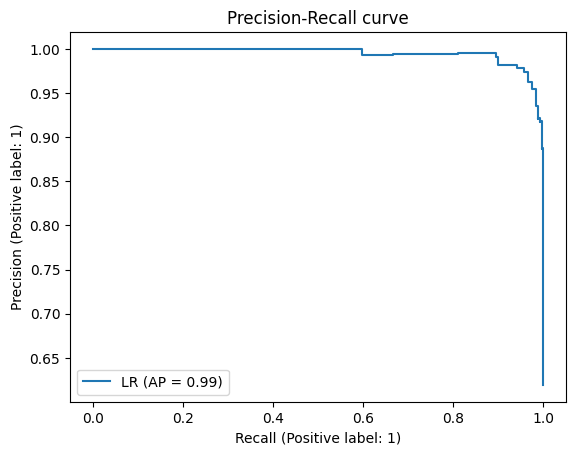

In [115]:
display = metrics.PrecisionRecallDisplay.from_predictions(y_train, y_score, name="LR")
_ = display.ax_.set_title("Precision-Recall curve")

### ROC AUC для тестовой выборки

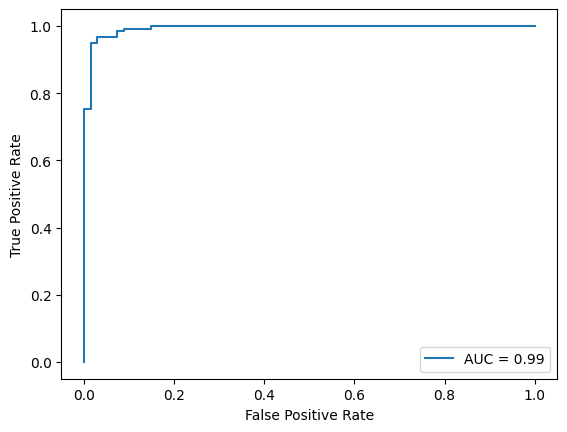

In [116]:
y_score = model.decision_function(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label = 1)
roc_auc = metrics.roc_auc_score(y_test, y_score)
roc_display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()

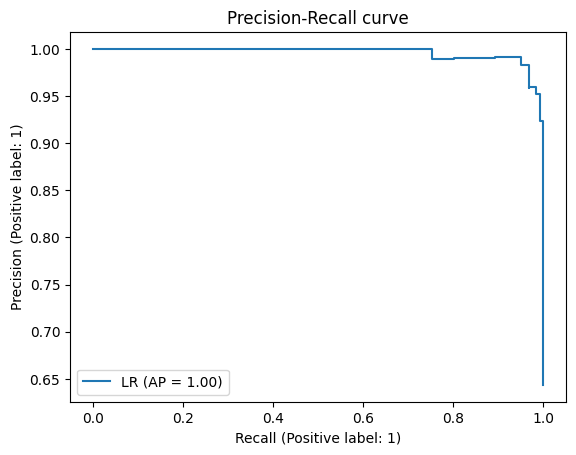

In [117]:
display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LR")
_ = display.ax_.set_title("Precision-Recall curve")

# Задание №5

### AdaBoostClassifier

In [118]:
estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=model, 
    n_estimators = n_est)
    
    ABC.fit(x_train, y_train)
    y_pred = ABC.predict(x_test)
    score = metrics.roc_auc_score(y_test, y_pred)
    abc_scores.append(score)
    print('n_est : ', n_est, '   abc_scores : ', score)

n_est :  1    abc_scores :  0.9577525595164673
n_est :  4    abc_scores :  0.956950783273714
n_est :  7    abc_scores :  0.9494880967065499
n_est :  10    abc_scores :  0.9453558653015913
n_est :  13    abc_scores :  0.9453558653015913
n_est :  16    abc_scores :  0.9453558653015913
n_est :  19    abc_scores :  0.9602812384359196
n_est :  22    abc_scores :  0.9602812384359196
n_est :  25    abc_scores :  0.9718761564080424
n_est :  28    abc_scores :  0.9602812384359196
n_est :  31    abc_scores :  0.9644134698408783
n_est :  34    abc_scores :  0.9602812384359196
n_est :  37    abc_scores :  0.9602812384359196
n_est :  40    abc_scores :  0.9602812384359196
n_est :  43    abc_scores :  0.9602812384359196
n_est :  46    abc_scores :  0.9602812384359196
n_est :  49    abc_scores :  0.9602812384359196


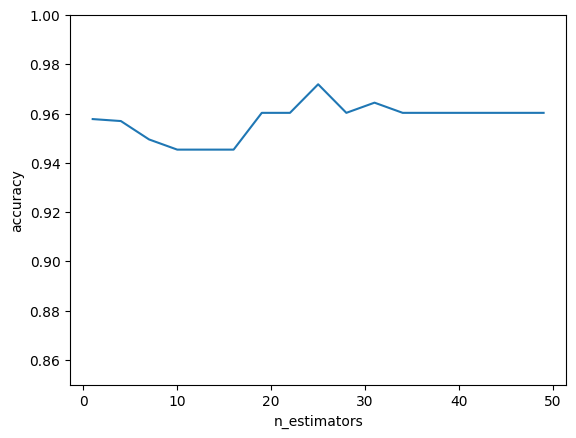

In [119]:
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

### GradientBoostingClassifier

In [120]:
GBRmodel = GradientBoostingClassifier(
    n_estimators = 300,
    learning_rate = 0.01,
    max_depth = 6,
    min_samples_split = 5, 
    min_samples_leaf = 30,
    max_features = 6,
    loss = 'deviance'
)

GBRmodelname = 'GradientBoosting'
GBRmodel.fit(x_train, y_train)
prediction = GBRmodel.predict(x_test)
roc = metrics.roc_auc_score(y_test, y_pred)
print(roc)

0.9602812384359196
